# Explore here

In [1]:
# RECOPILAMOS LOS DATOS

import pandas as pd 

url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df_raw = pd.read_csv(url)


In [2]:
# Pasar el archivo crudo, a data/raw
df_raw.to_csv("../data/raw/df_raw.csv", index = False)

In [3]:
# EXPLORAMOS Y LIMPIAMOS LOS DATOS 

# Obtenemos las dimensiones

filas, columnas = df_raw.shape

# Imprimir el número de filas y columnas
print(f'El DataFrame tiene {filas} filas y {columnas} columnas.')

El DataFrame tiene 48895 filas y 16 columnas.


In [4]:
# Buscamos informacion sobre los tipos de datos y los no nulos

df_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

De la informacion anterior, de las 16 columnas, 8 se consideran numericas, y 8 categoricas:

    - Categoricas: (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
    - Numericas: (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

In [5]:
# BUSCAMOS Y ELIMINAMOS DUPLICADOS 

# Busco duplicados solo en la columna id, ya que esta es unica, y sera utilizada para el analisis. 

df_raw['id'].duplicated().sum()

np.int64(0)

La columna 'id' no posee datos duplicados.

In [6]:
# Eliminamos las columnas que no seran utilizadas en el analisis 

df_raw.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True )


In [7]:
df_interim = df_raw.copy()
df_interim.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


**Analisis de variables univariadas**

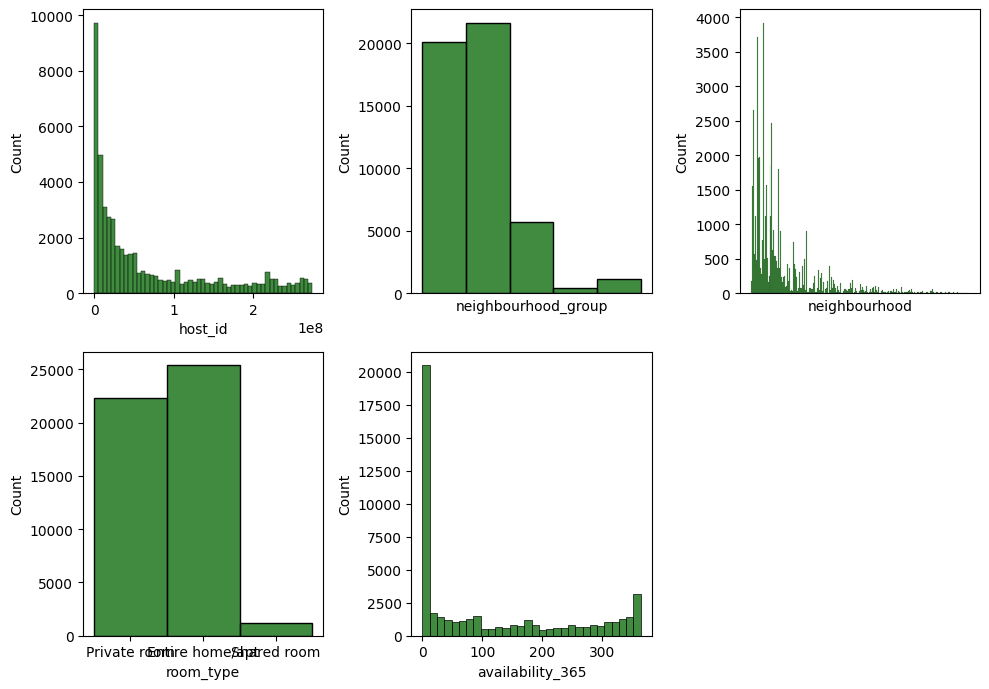

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=df_interim, x="host_id", color='darkgreen')
sns.histplot(ax=axis[0, 1], data=df_interim, x="neighbourhood_group", color='darkgreen').set_xticks([])
sns.histplot(ax=axis[0, 2], data=df_interim, x="neighbourhood", color='darkgreen').set_xticks([])
sns.histplot(ax=axis[1, 0], data=df_interim, x="room_type", color='darkgreen')
sns.histplot(ax=axis[1, 1], data=df_interim, x="availability_365", color='darkgreen')
fig.delaxes(axis[1, 2])


plt.tight_layout()
plt.show()

